In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the required datasets.
movies = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/ratings.csv')


In [2]:
# Explore the movies dataset
print("Movies dataset:")
print(movies.head())
print(movies.info())
print(movies.describe())

# Check for missing values in the movies dataset
print("Missing values in movies dataset:")
print(movies.isnull().sum())

Movies dataset:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
             movieId
count    9742.000000

In [3]:
# Explore the ratings dataset
print("Ratings dataset:")
print(ratings.head())
print(ratings.info())
print(ratings.describe())

# Check for missing values in the ratings dataset
print("Missing values in ratings dataset:")
print(ratings.isnull().sum())

Ratings dataset:
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB
None
              userId        movieId         rating     timestamp
count  100836.000000  100836.000000  100836.000000  1.008360e+05
mean      326.127564   19435.295718       3.501557  1.205946e+09
std       182.618491   35530.987199       1.042529  2.162610e+08
min         1.000000       1.000000       0.500000  8.281246e+08
25%       177.00000

In [4]:
import pandas as pd
ratings = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/ratings.csv')
# Assuming 'ratings' DataFrame contains userId, movieId, and rating columns
user_item_matrix = ratings.pivot_table(index='userId', columns='movieId', values='rating')

# Display the user-item matrix
print(user_item_matrix.head())


movieId  1       2       3       4       5       6       7       8       \
userId                                                                    
1           4.0     NaN     4.0     NaN     NaN     4.0     NaN     NaN   
2           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
5           4.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

movieId  9       10      ...  193565  193567  193571  193573  193579  193581  \
userId                   ...                                                   
1           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
2           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
3           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN   
4           NaN     NaN  ...     NaN     NaN     NaN     NaN     NaN     N

In [5]:
from sklearn.model_selection import train_test_split

# Split the data into a training set and a test set
train, test = train_test_split(ratings, test_size=0.2, random_state=42)

# Create the user-item matrix for the training set
train_matrix = train.pivot_table(index='userId', columns='movieId', values='rating')

# Create the user-item matrix for the test set
test_matrix = test.pivot_table(index='userId', columns='movieId', values='rating')

# **Collaborative Filtering**



In [6]:
!pip install scikit-surprise

In [7]:
import pandas as pd
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split

# Load the datasets
movies = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/ratings.csv')

# Define a rating scale
reader = Reader(rating_scale=(1, 5))

# Load the data with the reader
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the SVD algorithm
model = SVD()
model.fit(trainset)

predictions = model.test(testset)

#Get recommendations for a specific user
user_id = 1
user_movies = ratings[ratings['userId'] == user_id]['movieId']
user_unrated_movies = ratings[~ratings['movieId'].isin(user_movies)]['movieId'].unique()

# Predict ratings for unrated movies
user_recommendations = []
for movie_id in user_unrated_movies:
    prediction = model.predict(user_id, movie_id)
    user_recommendations.append((movie_id, prediction.est))

# Sort recommendations by predicted rating
user_recommendations.sort(key=lambda x: x[1], reverse=True)

# Print top recommendations
top_n = 10
print(f'Top {top_n} recommendations for user {user_id}:')
for movie_id, predicted_rating in user_recommendations[:top_n]:
    movie_title = movies[movies['movieId'] == movie_id]['title'].values[0]
    print(f'{movie_title}: Predicted rating {predicted_rating}')


Top 10 recommendations for user 1:
Rear Window (1954): Predicted rating 5
Amadeus (1984): Predicted rating 5
Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1964): Predicted rating 5
Ghost Dog: The Way of the Samurai (1999): Predicted rating 5
Godfather, The (1972): Predicted rating 5
Cool Hand Luke (1967): Predicted rating 5
Godfather: Part II, The (1974): Predicted rating 5
Boondock Saints, The (2000): Predicted rating 5
Ghost in the Shell (Kôkaku kidôtai) (1995): Predicted rating 5
Little Big Man (1970): Predicted rating 5


# **Content-Based Filtering**



In [8]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

movies = pd.read_csv('/content/drive/MyDrive/ML L&T EduTech/Task-5/movies.csv')

# Combine relevant features into a single column
movies['features'] = movies['movieId'].astype(str) + ' ' + movies['title'] + ' ' + movies['genres']

# Initialize a TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

tfidf_matrix = tfidf.fit_transform(movies['features'])

# Calculate cosine similarity between items
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

def recommend_movies(movie_title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = movies.loc[movies['title'] == movie_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    # Get the top 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

movie_title = "Toy Story (1995)"
recommended_movies = recommend_movies(movie_title)
print("Recommended movies for", movie_title, ":")
print(recommended_movies)


Recommended movies for Toy Story (1995) :
2355                       Toy Story 2 (1999)
7355                       Toy Story 3 (2010)
3595                          Toy, The (1982)
2539    We're Back! A Dinosaur's Story (1993)
1                              Jumanji (1995)
4089                      Toy Soldiers (1991)
1617            NeverEnding Story, The (1984)
12                               Balto (1995)
109         NeverEnding Story III, The (1994)
6194                         Wild, The (2006)
Name: title, dtype: object


Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8651  0.8745  0.8813  0.8660  0.8732  0.8720  0.0060  
Fit time          1.67    2.68    2.10    3.55    1.70    2.34    0.71    
Test time         0.29    0.22    0.21    0.42    0.14    0.25    0.09    


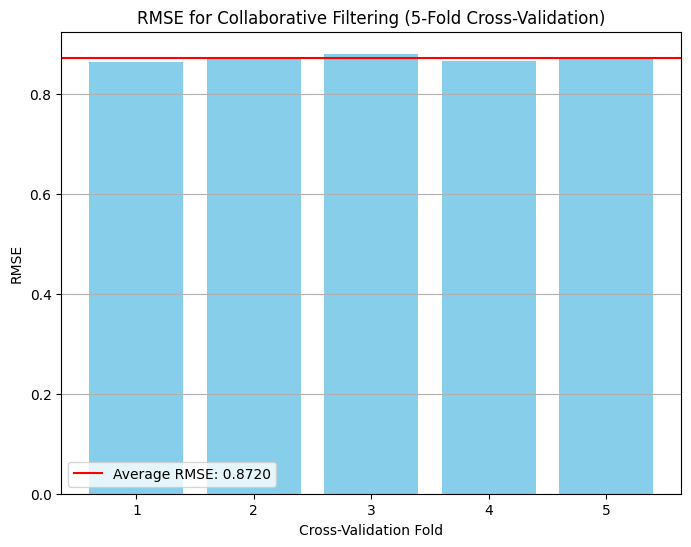

Average RMSE for collaborative filtering: 0.8720054354125981


In [18]:
#Accuracy of collaborative filtering

import matplotlib.pyplot as plt

# Use cross-validation to evaluate RMSE
model = SVD()
cv_results = cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

rmse_values = cv_results['test_rmse']
avg_rmse_collab = sum(rmse_values) / len(rmse_values)

# Plot RMSE values
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(rmse_values) + 1), rmse_values, color='skyblue')
plt.axhline(y=avg_rmse_collab, color='r', linestyle='-', label=f'Average RMSE: {avg_rmse_collab:.4f}')
plt.xlabel('Cross-Validation Fold')
plt.ylabel('RMSE')
plt.title('RMSE for Collaborative Filtering (5-Fold Cross-Validation)')
plt.legend()
plt.grid(axis='y')
plt.show()

print(f'Average RMSE for collaborative filtering: {avg_rmse_collab}')
